In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output. Jub Jub

In [35]:
dataset = pd.read_csv('https://raw.githubusercontent.com/artist0123/ProjectPSIT/main/master.csv', engine = 'python', sep = ',')

In [36]:
dataset.head()

,Country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
unique_country = data['Country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

This graph is a **<span style=color:red>comparision</span>** between year and suicide_no

Text(0.5, 0.91, 'Worldwide Suicide (1985 - 2015)')

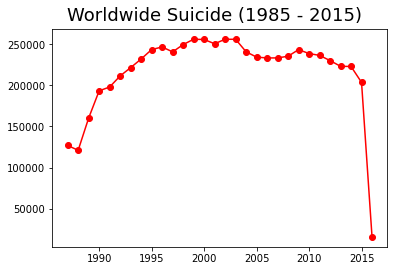

In [27]:
data_year = dataset[data.year >= 1987].groupby('year').sum()
plt.plot(data_year.index, data_year['suicides_no'], 'ro-')
plt.figtext(.5,.91,'Worldwide Suicide (1985 - 2015)', color='black', fontsize=18, ha='center')

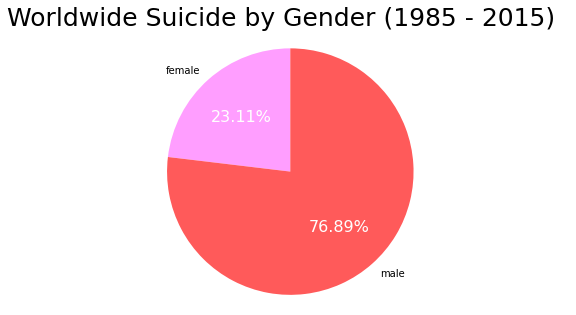

In [30]:
data_grp_mf = dataset.groupby(by=['sex']).agg({"suicides_no": ['sum']})
data_grp_mf.columns = ['total_suicide']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['total_suicide'], labels=data_grp_mf['sex'], autopct='%1.2f%%', startangle=90, colors=['#ff9eff', '#ff5a5a'])
ax1.axis('equal')

plt.setp(autotexts, size=16, color="w")
plt.figtext(.5,.91,'Worldwide Suicide by Gender (1985 - 2015)', color='black', fontsize=25, ha='center')
plt.show()

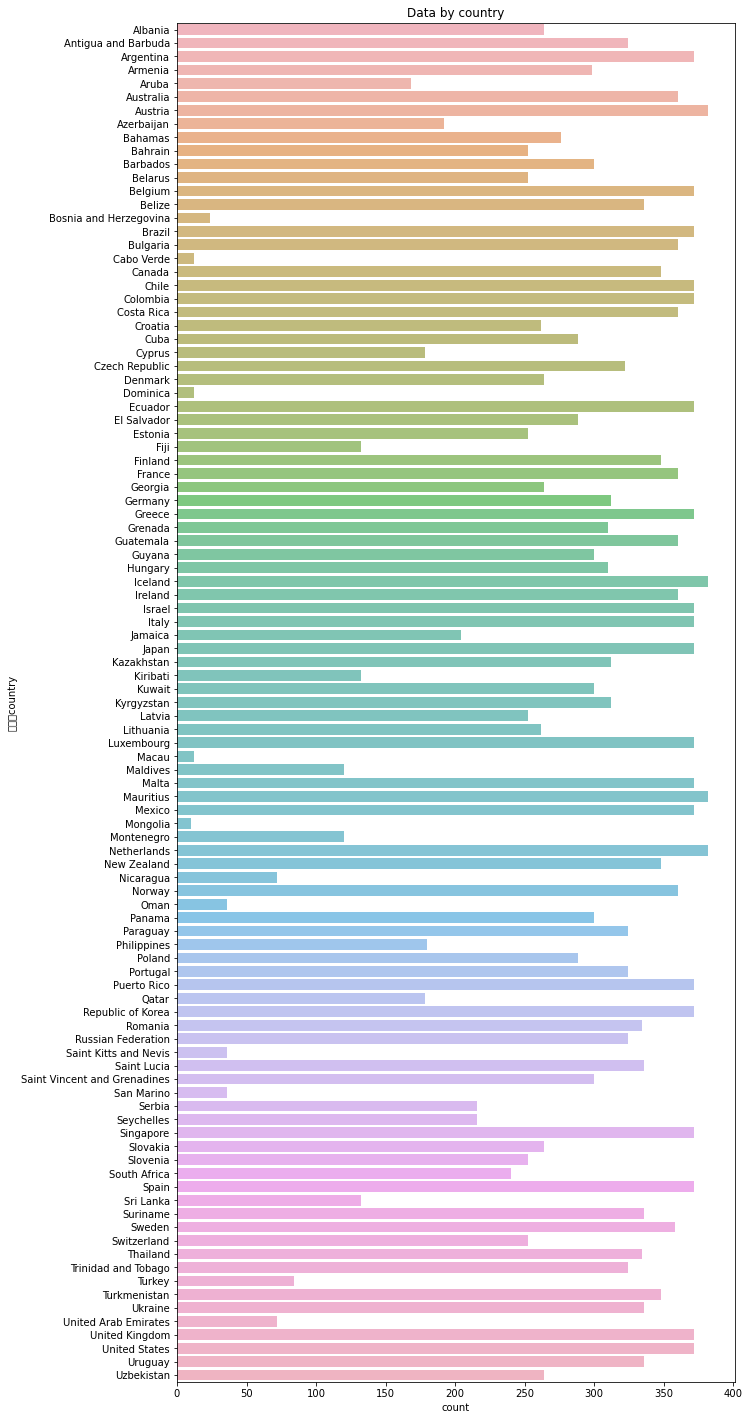

In [31]:
###Let's check for country
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='Country', data=data, alpha=alpha)
plt.title('Data by country')
plt.show()

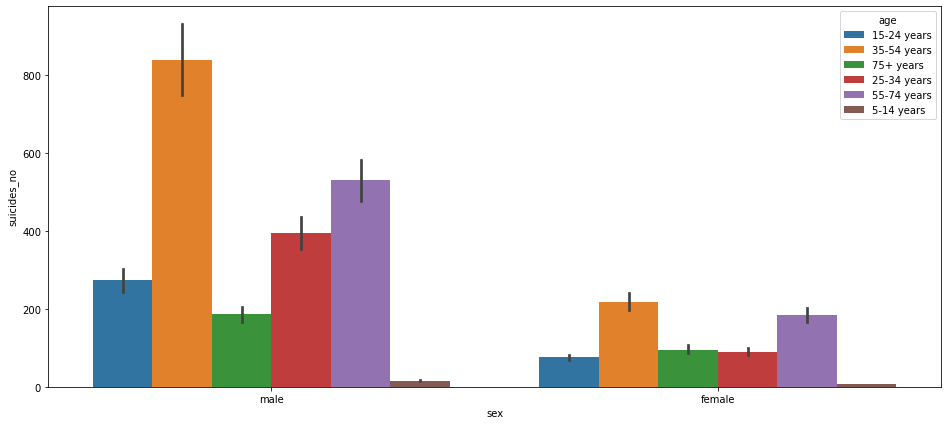

In [32]:
### Set figure size
plt.figure(figsize=(16,7))
###Let's plot the barplot
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = dataset)

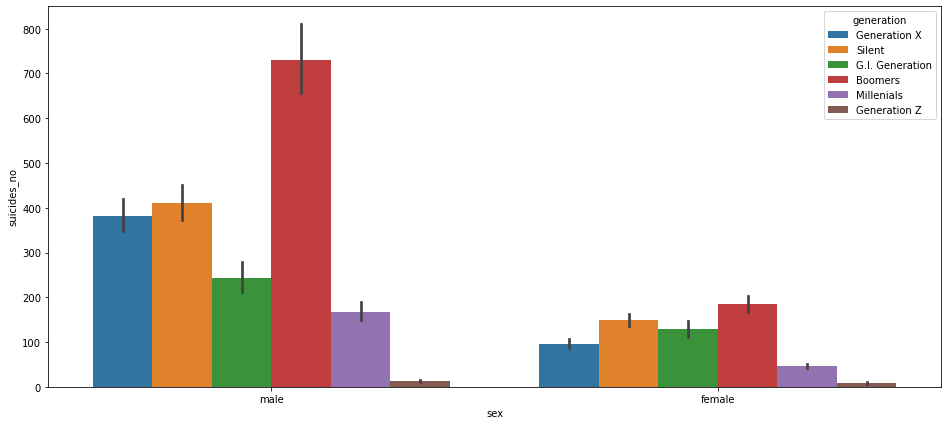

In [33]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)

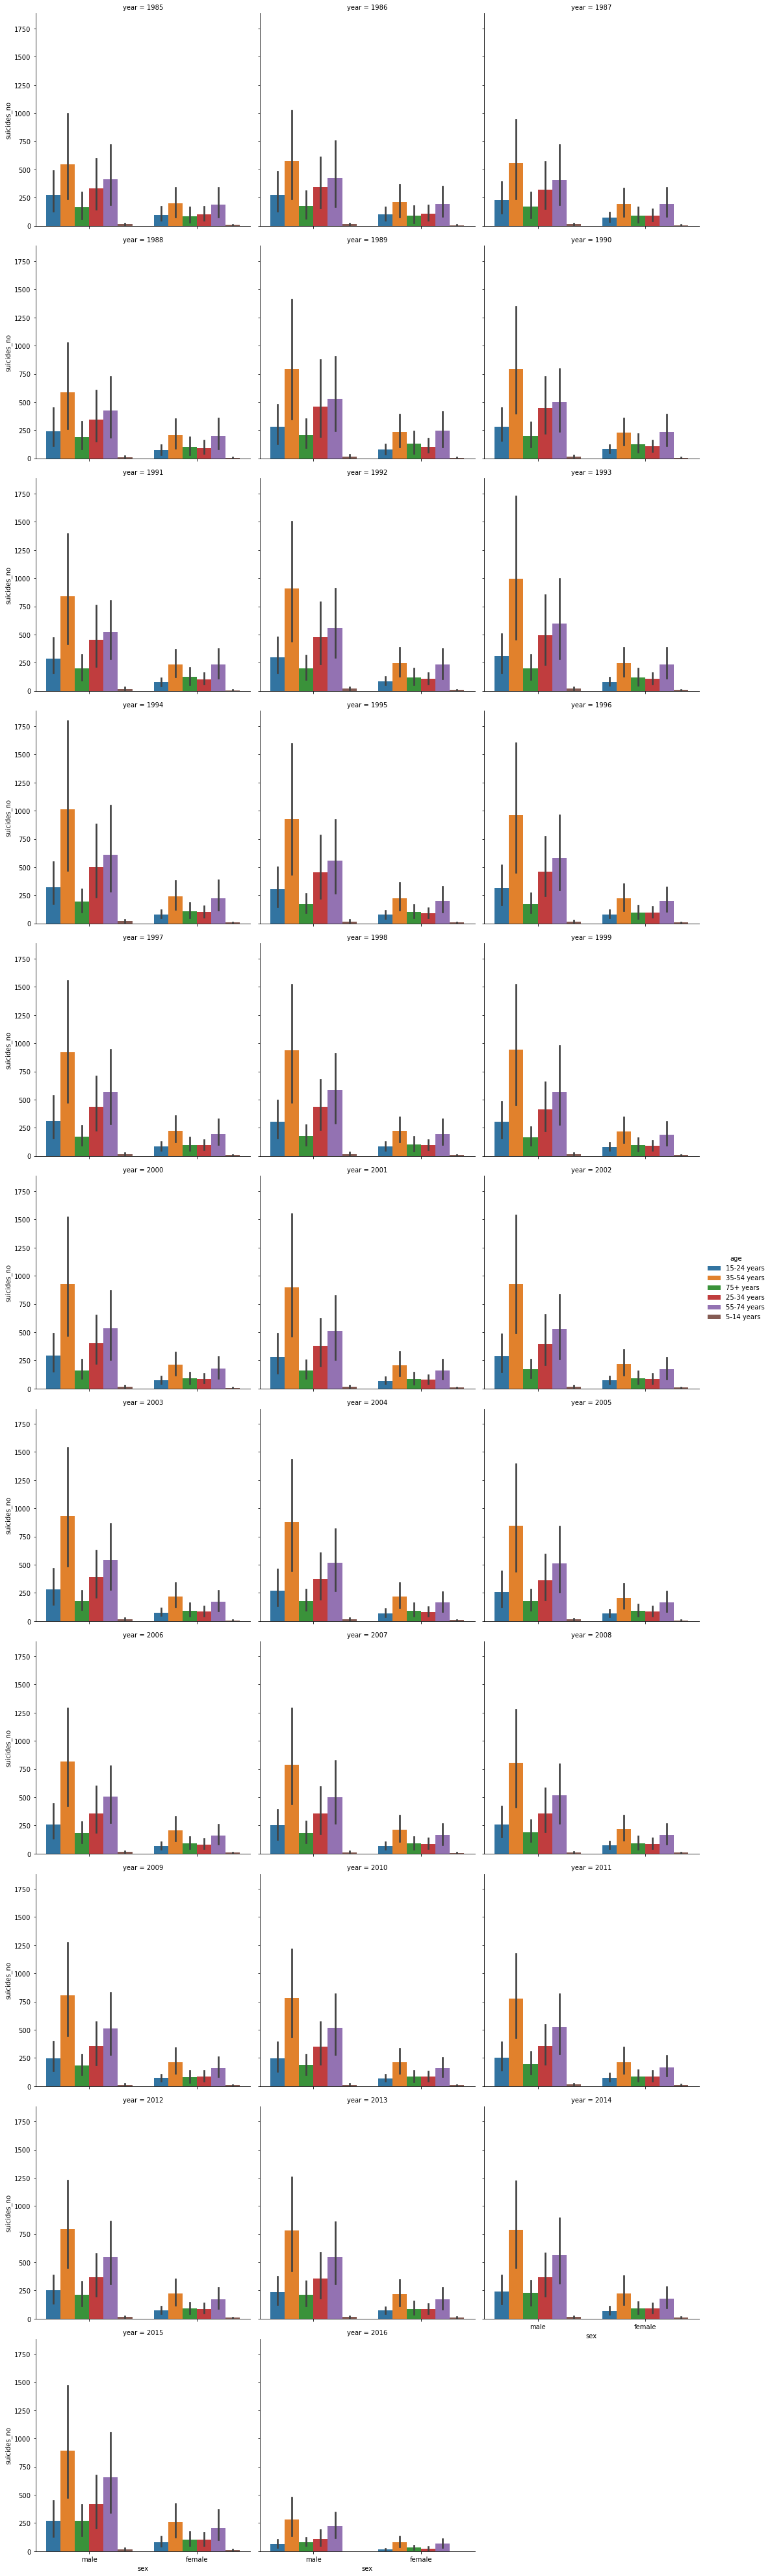

In [34]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=dataset,kind='bar',col_wrap=3)